In [1]:
from hSIR import HyperSIRModel
import numpy as np
import ndlib.models.ModelConfig as mc
import networkx as nx
from utils import save_obj, load_obj
from hda_main import run
import networkx as nx
import matplotlib.pyplot as plt
# 读取网络
# path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\netwwork\p2p-Gnutella05.txt"
# def read_txt_direct(data):
#     g = nx.read_edgelist(data,  nodetype=int, create_using=nx.DiGraph())
#     return g
# g = read_txt_direct(path)
# for beta_t in [0.1]:
#     for gamma_t in [0.003, 0.006, 0.009, 0.012]:
#         i = 1
#         round = 3000
#         Is = 0.002
#         n_nodes = nx.number_of_nodes(g)
#         model = HyperSIRModel(g)
#         beta_list = np.random.exponential(beta_t, n_nodes)
#         gamma_list = np.random.exponential(gamma_t, n_nodes)
#         cfg = mc.Configuration()
#         cfg.add_model_parameter('beta', beta_list)
#         cfg.add_model_parameter('gamma', gamma_list)
#         cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
#         model.set_initial_status(cfg)
#         iterations = model.iteration_bunch(bunch_size=3000)
#         trends = model.build_trends(iterations)
#         save_obj(trends, './scen2_data/beta_{}gamma_{}trends{}'.format(beta_t, gamma_t,i))
#         gt_param = {'graph': g, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':8846, 'save_dir':'./scen2_data/res/'}
#         run(gt_param = gt_param, beta=0.01, gamma=0.01, task='all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both', name = 'beta_{}gamma_{}_num{}'.format(beta_t, gamma_t,i))

In [6]:
trends = load_obj(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\trends")

In [2]:
res = np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2_data\res\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10.npy')
res2 = np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2_data\res\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L102.npy')
res3= np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2_data\res\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103.npy')

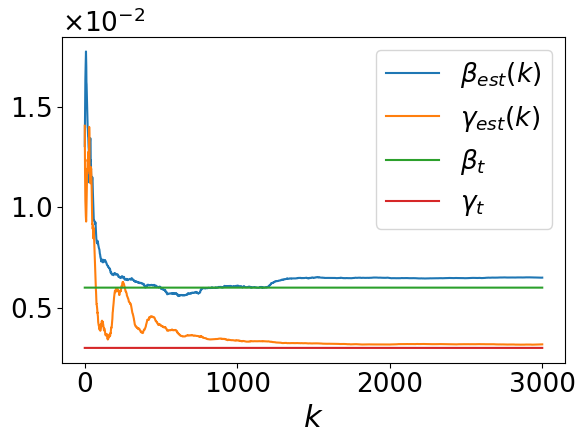

In [154]:
from utils import reverse_map
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,2]), res2[:,2], res3[:,2])], label = r"$\beta_{est}(k)$")
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,3]), res2[:,3], res3[:,3])], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([0.006 for i in res[:,0]], label = r"$\beta_{t}$")
ax1.plot([0.003 for i in res[:,0]], label = r"$\gamma_{t}$")
plt.tight_layout()
ax1.legend(loc = "best")
plt.show()

In [164]:
def cal_acc(beta_t, gamma_t, trends, res):
    ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2]]).mean()
    ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3]]).mean()
    ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[30:]/8846)]).mean()
    ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[30:]/8846)]).mean()
    return ave_beta, ave_gamma, ave_i, ave_r
a,b,c,d = cal_acc(0.006, 0.003, trends, res)

In [165]:
print(a+b)
print(c+d)

0.25810840544287394
0.08892657774183763


In [148]:
a1,b1,c1,d1 = cal_acc(0.006, 0.003, trends, res2)
a2,b2,c2,d2 = cal_acc(0.006, 0.003, trends, res3)

In [149]:
print(a+b)
print(c+d)
print(a2+b2)
print(c2+d2)
print(a1+b1)
print(c1+d1)

0.22633473164685808
0.0173572400519917
0.2294031851229381
0.02542964985497755
0.3712920721836153
0.03950632243728757


In [150]:
print((a+b+a1+b1+a2+b2)/3)
print((c+d+c1+d1+c2+d2)/3)

0.2756766629844705
0.027431070781418942


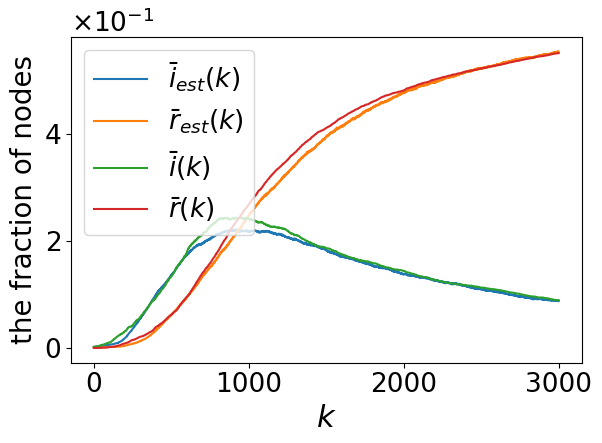

In [160]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot(res[:,0], label = r"$\bar{i}_{est}(k)$")
ax1.plot(res[:,1], label = r"$\bar{r}_{est}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$")
plt.tight_layout()
plt.legend()
plt.show()

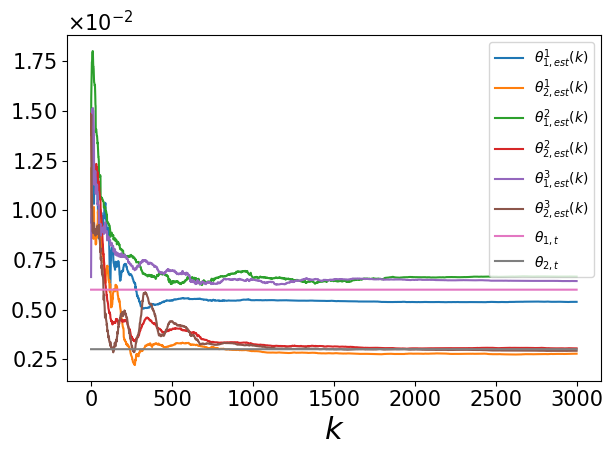

In [10]:
from utils import reverse_map
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size':15})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot([reverse_map(i)+0.001 for i in res[:,2]], label = r"$\theta_{1,est}^{1}(k)$")
ax1.plot([reverse_map(i)+0.0001 for i in res[:,3]], label = r"$\theta_{2,est}^{1}(k)$")
ax1.plot([reverse_map(i)-0.0008 for i in res2[:,2]], label = r"$\theta_{1,est}^{2}(k)$")
ax1.plot([reverse_map(i) for i in res2[:,3]], label = r"$\theta_{2,est}^{2}(k)$")
ax1.plot([reverse_map(i)-0.0008 for i in res3[:,2]], label = r"$\theta_{1,est}^{3}(k)$")
ax1.plot([reverse_map(i) for i in res3[:,3]], label = r"$\theta_{2,est}^{3}(k)$")
ax1.plot([0.006 for i in res[:,0]], label = r"$\theta_{1,t}$")
ax1.plot([0.003 for i in res[:,0]], label = r"$\theta_{2,t}$")
plt.tight_layout()
ax1.legend(fontsize = 10, loc = "upper right")
plt.savefig('scen2_para.jpg', dpi = 300)
plt.show()

0.07766421354190432 0.14867051810495377 0.0033242273342690212 0.014033012717722677


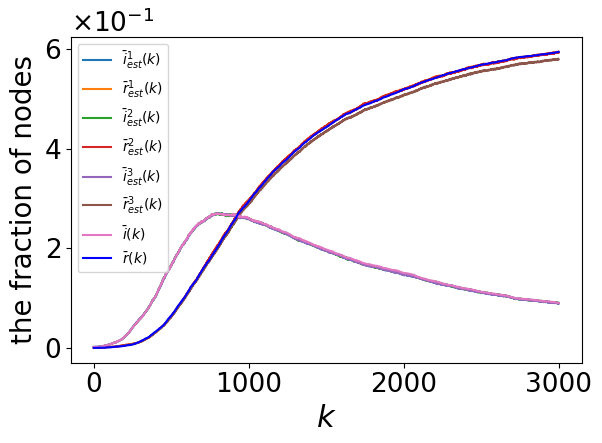

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot(res[:,0], label = r"$\bar{i}_{est}^{1}(k)$")
ax1.plot(res[:,1], label = r"$\bar{r}_{est}^{1}(k)$")
ax1.plot(res2[:,0], label = r"$\bar{i}_{est}^{2}(k)$")
ax1.plot((100*res[:,1]+res3[:,1])/101, label = r"$\bar{r}_{est}^{2}(k)$")
ax1.plot((4*res[:,0]+res2[:,0])/5, label = r"$\bar{i}_{est}^{3}(k)$")
ax1.plot((res[:,1]+res2[:,1])/2, label = r"$\bar{r}_{est}^{3}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$", c = 'b')
plt.tight_layout()
ax1.legend(fontsize = 10, loc = "best")
plt.savefig('hda_state.jpg', dpi = 300)
plt.show()

In [179]:
l3 = []
for beta_t in [0.005, 0.01, 0.015, 0.02]:
    l2 = []
    for gamma_t in [0.003, 0.006, 0.009, 0.012]:
        l1 = []
        for num in [0,1,2]:
            res = np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\res\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_{}gamma_{}_num{}.npy'.format(beta_t, gamma_t,num))
            trends = load_obj(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\beta_{}gamma_{}trends".format(beta_t, gamma_t))
            def cal_acc(beta_t, gamma_t, trends, res):
                ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2]]).mean()
                ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3]]).mean()
                ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[30:]/8846)]).mean()
                ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[30:]/8846)]).mean()
                return ave_beta, ave_gamma, ave_i, ave_r
            a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
            l1.append([a,b,c,d])
        l2.append(l1)
    l3.append(l2)
    

In [110]:
print(l3)

[[[[0.08539689863899635, 0.18317242582019358, 0.02288770515775538, 0.05802615793437895], [0.08187037489661908, 0.20269944344605934, 0.03283266809965071, 0.14250834725911807], [0.13709981480674902, 0.21868076517474033, 0.002928250084661867, 0.08599832765717576]], [[0.07960783449994721, 0.02674886199954716, 0.033233009372327885, 0.06464924359750412], [0.0846365883241218, 0.04090919650518314, 0.023264768424743242, 0.02060322278057466], [0.06881514685476822, 0.0505978184848815, 0.0022976244041312435, 0.004258773339719125]], [[0.07690138293836243, 0.09498497289895982, 0.10396307733351488, 0.07846076855445265], [0.0552183879326192, 0.038017071812454846, 0.06534448987483864, 0.054555026724888184], [0.10146752140812187, 0.013580388836505764, 0.0026050918923254374, 0.01996752640477661]], [[0.6387257338361677, 0.03146090717258693, 0.6246963813422792, 0.30984391546488244], [0.40056174625878144, 0.013236271097081262, 2.528002112330895, 1.060960151065055], [0.045515092551347835, 0.00274248242274463

In [116]:
l3.shape

(4, 4, 3, 4)

In [172]:
beta_t = 0.005
gamma_t = 0.012
num = 2
res = np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\res\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_{}gamma_{}_num{}.npy'.format(beta_t, gamma_t,num))
trends = load_obj(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\beta_{}gamma_{}trends".format(beta_t, gamma_t))

In [173]:
def cal_acc(beta_t, gamma_t, trends, res):
    ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2]]).mean()
    ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3]]).mean()
    ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[30:]/8846)]).mean()
    ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[30:]/8846)]).mean()
    return ave_beta, ave_gamma, ave_i, ave_r
a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
print(a+b)
print(c+d)

0.04825757497409247
0.007820295249878243


In [180]:
l3 = np.array(l3)
m = np.zeros((4,4,2))
for i in range(4):
    for j in range(4):
        x = l3[i,j,:].min(axis = 0)
        m[i,j,:] = sum(x[:2]),sum(x[2:])
    
        

(4, 4, 2)

In [184]:
print(m[3,:])

[[0.22284642 0.01210253]
 [0.09462875 0.02029312]
 [0.17074727 0.01461311]
 [0.20628491 0.01264943]]


In [128]:
m

array([[[0.30297324, 0.11506049],
        [0.11710515, 0.04943555],
        [0.12672324, 0.10829866],
        [0.37741408, 1.51044095]],

       [[0.24136818, 0.05511927],
        [0.27523636, 0.03841808],
        [0.15413141, 0.03433845],
        [0.1006906 , 0.06815396]],

       [[0.16180163, 0.03835732],
        [0.22676227, 0.01868357],
        [0.14651288, 0.04701203],
        [0.24345285, 0.03739474]],

       [[0.29853239, 0.03573841],
        [0.22975098, 0.05423087],
        [0.25336034, 0.02394247],
        [0.31018317, 0.02248454]]])